# Identifying Last Two digit for the Assignment Guideline

In [1]:
id = 20216039
print('My Id is:', id, '.','The last digit of my ID is:', str(id)[-2:])
Mod = 39%2
print('The Modulo of the last two digit of my ID is', Mod, '.', '\nMy assignment Dataset is Wine Quality Data.')

My Id is: 20216039 . The last digit of my ID is: 39
The Modulo of the last two digit of my ID is 1 . 
My assignment Dataset is Wine Quality Data.


# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
df=pd.read_csv('winedata.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
 12  rt.sulfur.dioxide     2037 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.0 KB


In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rt.sulfur.dioxide
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,5.000000
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,7.681146
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,6.324555
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5,4.898979
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,6.000000


# Necessity of Dropping rt.sulfur.dioxide (As Assignment guideline provides 12 Columns & The Dataset Contains 13 Columns)

In [5]:
df.drop(['rt.sulfur.dioxide'], axis =1, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 191.1 KB


# Appending Dataset According to the Assignment Guideline

In [7]:
# List of data series
datarowsSeries = [pd.Series([7.8+.39,.88+.39,0.00+.39,1.9,0.09+.39,25.0+.39,67.0+.39,.991+.39,3.22,0.68+.39,9.8+.39,5], index=df.columns ), pd.Series([7.2+.39,.83+.39,0.01+.39,2.2,0.19+.39,15.0+.39,60.0+.39,.996+.39,3.52,0.55+.39,9.6+.39,6], index=df.columns ), pd.Series([7.9+.39,.89+.39,0.01+.39,1.7,0.08+.39,22.0+.39,57.0+.39,.997+.39,3.26,0.64+.39,9.8+.39,2], index=df.columns ), pd.Series([7.7+.39,.86+.39,0.02+.39,2.3,0.07+.39,11.0+.39,38.0+.39,.994+.39,3.12,0.08+.39,9.4+.39,3], index=df.columns ) ]

# Check The DF For Verifying Newly Appended Data

In [8]:
df.iloc[-4:]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
2034,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7
2035,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5
2036,5.7,0.22,0.28,1.3,0.027,26.0,101.0,0.98948,3.35,0.38,12.5,7


# New Appended DF named new_data

In [9]:
new_data = df.append(datarowsSeries, ignore_index=True)

In [10]:
new_data.iloc[-8:]


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.40,0.19,0.31,14.5,0.045,39.00,193.00,0.99860,3.10,0.50,9.20,6.0
2034,6.70,0.36,0.26,7.9,0.034,39.00,123.00,0.99119,2.99,0.30,12.20,7.0
2035,7.70,0.28,0.35,15.3,0.056,31.00,117.00,0.99980,3.27,0.50,9.60,5.0
2036,5.70,0.22,0.28,1.3,0.027,26.00,101.00,0.98948,3.35,0.38,12.50,7.0
2037,8.19,1.27,0.39,1.9,0.480,25.39,67.39,1.38100,3.22,1.07,10.19,5.0
2038,7.59,1.22,0.40,2.2,0.580,15.39,60.39,1.38600,3.52,0.94,9.99,6.0
2039,8.29,1.28,0.40,1.7,0.470,22.39,57.39,1.38700,3.26,1.03,10.19,2.0
2040,8.09,1.25,0.41,2.3,0.460,11.39,38.39,1.38400,3.12,0.47,9.79,3.0


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2041 non-null   float64
 1   volatile.acidity      2041 non-null   float64
 2   citric.acid           2041 non-null   float64
 3   residual.sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free.sulfur.dioxide   2041 non-null   float64
 6   total.sulfur.dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Changed Column Name for Ease

In [12]:
new_data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'   ]

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2041 non-null   float64
 1   volatile_acidity      2041 non-null   float64
 2   citric_acid           2041 non-null   float64
 3   residual_sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free_sulfur_dioxide   2041 non-null   float64
 6   total_sulfur_dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Suitable Plotting

<AxesSubplot:>

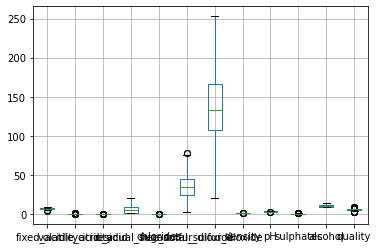

In [14]:
new_data.boxplot()

# Checked Specific Column for Better Visualization

<AxesSubplot:>

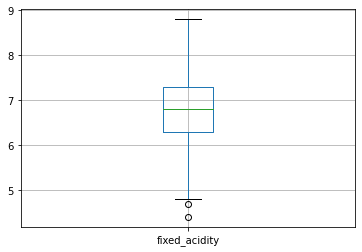

In [15]:
new_data.boxplot('fixed_acidity')

# Found Outlier in The fixed_acidity Column. Found IQR To Remove The outlier.

In [16]:
#Finding IQR for the removal of outliers of the values of fixed|_acidity column
sort_data = np.sort(new_data['fixed_acidity'])
Q1 = np.percentile(new_data['fixed_acidity'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['fixed_acidity'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

1.0


In [17]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 4.8
Upper limit is: 8.8
Q1: 6.3
Q3: 7.3


In [18]:
outliers = new_data.fixed_acidity[(new_data.fixed_acidity >= up_lim) | (new_data.fixed_acidity <= low_lim )]
print(outliers)


313     8.8
425     8.8
798     8.8
839     4.8
879     8.8
1051    4.4
1205    8.8
1275    8.8
1288    4.8
1324    8.8
1496    4.8
1597    8.8
1736    4.8
1838    4.7
2016    4.8
Name: fixed_acidity, dtype: float64


In [19]:
new_data.shape 

(2041, 12)

# Dropping outliers for fixed_acidity Column

In [20]:
#dropping the outliers
new_data.drop(new_data[new_data['fixed_acidity']>= 8.8].index, inplace = True)
new_data.shape 

(2033, 12)

In [21]:
#dropping the outliers
new_data.drop(new_data[new_data['fixed_acidity']<= 4.8].index, inplace = True)
new_data.shape 

(2026, 12)

# Verifying the fixed_acidity Boxplot again to be sure about Outlier Removal

<AxesSubplot:>

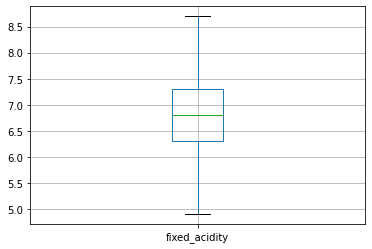

In [22]:
new_data.boxplot('fixed_acidity')

# Everything is OK. Proceed to Next Outlier Removal for other columns.

# Steps for volatile_acidity Column

<AxesSubplot:>

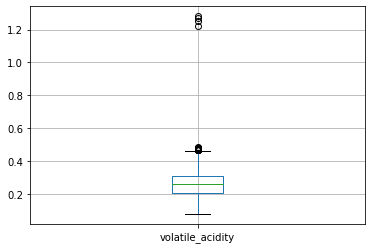

In [23]:
new_data.boxplot('volatile_acidity')

In [24]:
#Finding IQR for the removal of outliers of the values of volatile_acidity column
sort_data = np.sort(new_data['volatile_acidity'])
Q1 = np.percentile(new_data['volatile_acidity'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['volatile_acidity'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.1


In [25]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.05999999999999997
Upper limit is: 0.46
Q1: 0.21
Q3: 0.31


In [26]:
outliers = new_data.volatile_acidity[(new_data.volatile_acidity >= up_lim) | (new_data.volatile_acidity <= low_lim )]
print(outliers)

99      0.470
162     0.460
204     0.460
237     0.480
456     0.470
483     0.460
491     0.470
498     0.460
499     0.485
602     0.460
634     0.460
742     0.470
842     0.460
845     0.475
854     0.460
860     0.480
1010    0.460
1029    0.480
1122    0.480
1312    0.460
1340    0.460
1378    0.480
1380    0.470
1412    0.460
1455    0.460
1529    0.460
1668    0.460
1696    0.480
1710    0.480
1852    0.480
1864    0.480
1877    0.470
1892    0.460
1969    0.460
2037    1.270
2038    1.220
2039    1.280
2040    1.250
Name: volatile_acidity, dtype: float64


In [27]:
new_data.shape 

(2026, 12)

In [28]:
#dropping the outliers
new_data.drop(new_data[new_data['volatile_acidity']>= 0.46].index, inplace = True)
new_data.shape 

(1988, 12)

In [29]:
#dropping the outliers
new_data.drop(new_data[new_data['volatile_acidity']<= 0.05999999999999997].index, inplace = True)
new_data.shape 

(1988, 12)

<AxesSubplot:>

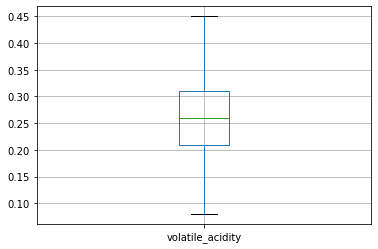

In [30]:
new_data.boxplot('volatile_acidity')

# Steps for citric_acid Column

<AxesSubplot:>

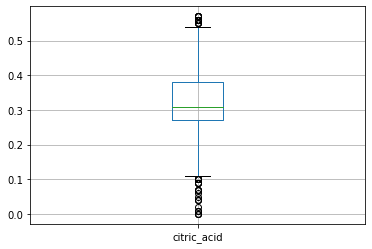

In [31]:
new_data.boxplot('citric_acid')

In [32]:
#Finding IQR for the removal of outliers of the values of citric_acid column
sort_data = np.sort(new_data['citric_acid'])
Q1 = np.percentile(new_data['citric_acid'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['citric_acid'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.10999999999999999


In [33]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.10500000000000004
Upper limit is: 0.5449999999999999
Q1: 0.27
Q3: 0.38


In [34]:
outliers = new_data.citric_acid[(new_data.citric_acid >= up_lim) | (new_data.citric_acid <= low_lim )]
print(outliers)

82      0.07
131     0.56
135     0.00
194     0.07
222     0.56
239     0.10
247     0.55
257     0.56
266     0.09
294     0.56
356     0.07
376     0.10
404     0.56
426     0.02
445     0.55
676     0.07
698     0.06
717     0.56
865     0.10
1011    0.01
1076    0.01
1094    0.57
1114    0.57
1242    0.04
1260    0.01
1262    0.57
1263    0.56
1277    0.00
1310    0.10
1346    0.09
1368    0.55
1370    0.56
1371    0.04
1395    0.05
1463    0.57
1470    0.10
1517    0.55
1544    0.56
1571    0.56
1596    0.10
1623    0.00
1666    0.57
1708    0.56
1800    0.09
1813    0.56
1826    0.09
1867    0.04
1933    0.56
Name: citric_acid, dtype: float64


In [35]:
new_data.shape 

(1988, 12)

In [36]:
#dropping the outliers
new_data.drop(new_data[new_data['citric_acid']>= 0.5449999999999999].index, inplace = True)
new_data.shape

(1966, 12)

In [37]:
#dropping the outliers
new_data.drop(new_data[new_data['citric_acid']<= 0.10500000000000004].index, inplace = True)
new_data.shape 

(1940, 12)

<AxesSubplot:>

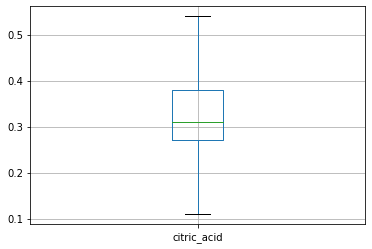

In [38]:
new_data.boxplot('citric_acid')

# Steps for residual_sugar Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

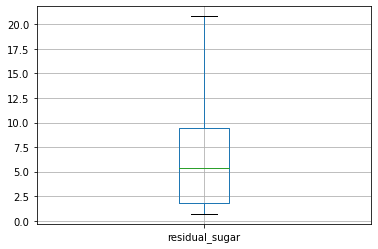

In [39]:
new_data.boxplot('residual_sugar')


# Steps for chlorides Column 

<AxesSubplot:>

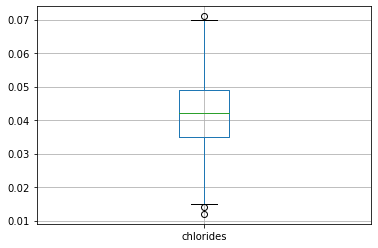

In [40]:
new_data.boxplot('chlorides')


In [41]:
#Finding IQR for the removal of outliers of the values of chlorides column
sort_data = np.sort(new_data['chlorides'])
Q1 = np.percentile(new_data['chlorides'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['chlorides'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.013999999999999999


In [42]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.014000000000000005
Upper limit is: 0.07
Q1: 0.035
Q3: 0.049


In [43]:
outliers = new_data.citric_acid[(new_data.chlorides >= up_lim) | (new_data.chlorides <= low_lim )]
print(outliers)

92      0.27
117     0.28
400     0.41
542     0.30
1250    0.30
1444    0.30
1734    0.28
Name: citric_acid, dtype: float64


In [44]:
new_data.shape 

(1940, 12)

In [45]:
#dropping the outliers
new_data.drop(new_data[new_data['chlorides']>= 0.07].index, inplace = True)
new_data.shape

(1935, 12)

In [46]:
#dropping the outliers
new_data.drop(new_data[new_data['chlorides']<= 0.014000000000000005].index, inplace = True)
new_data.shape 

(1933, 12)

<AxesSubplot:>

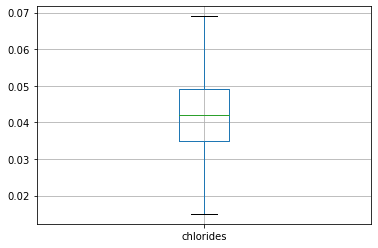

In [47]:
new_data.boxplot('chlorides')

# Steps for free_sulfur_dioxide Column

<AxesSubplot:>

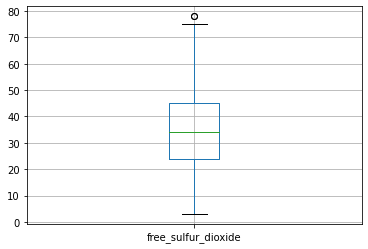

In [48]:
new_data.boxplot('free_sulfur_dioxide')

In [49]:
#Finding IQR for the removal of outliers of the values of free_sulfur_dioxide column
sort_data = np.sort(new_data['free_sulfur_dioxide'])
Q1 = np.percentile(new_data['free_sulfur_dioxide'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['free_sulfur_dioxide'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

21.0


In [50]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: -7.5
Upper limit is: 76.5
Q1: 24.0
Q3: 45.0


In [51]:
outliers = new_data.citric_acid[(new_data.free_sulfur_dioxide >= up_lim) | (new_data.free_sulfur_dioxide <= low_lim )]
print(outliers)

1618    0.48
1931    0.50
Name: citric_acid, dtype: float64


In [52]:
new_data.shape 

(1933, 12)

In [53]:
#dropping the outliers
new_data.drop(new_data[new_data['free_sulfur_dioxide']>= 76.5].index, inplace = True)
new_data.shape

(1931, 12)

In [54]:
#dropping the outliers
new_data.drop(new_data[new_data['free_sulfur_dioxide']<= -7.55].index, inplace = True)
new_data.shape 

(1931, 12)

<AxesSubplot:>

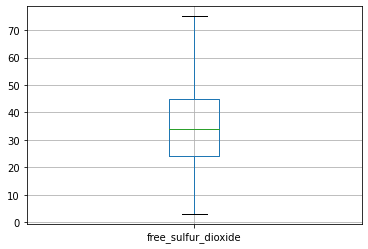

In [55]:
new_data.boxplot('free_sulfur_dioxide')

# Steps for total_sulfur_dioxide Column . (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

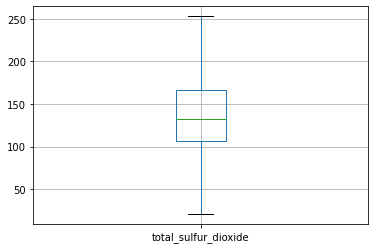

In [56]:
new_data.boxplot('total_sulfur_dioxide')

# Steps for density Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

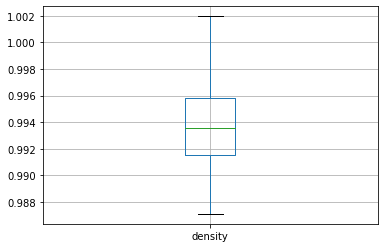

In [57]:
new_data.boxplot('density')

# Steps for pH Column

<AxesSubplot:>

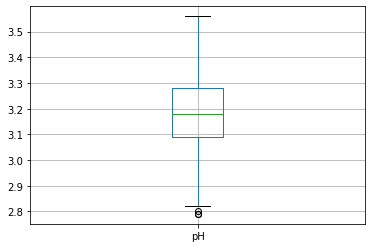

In [58]:
new_data.boxplot('pH')

In [59]:
 #Finding IQR for the removal of outliers of the values of pH column
sort_data = np.sort(new_data['pH'])
Q1 = np.percentile(new_data['pH'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['pH'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.18999999999999995


In [60]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 2.8049999999999997
Upper limit is: 3.5649999999999995
Q1: 3.09
Q3: 3.28


In [61]:
outliers = new_data.pH[(new_data.pH >= up_lim) | (new_data.pH <= low_lim )]
print(outliers)

4      2.80
133    2.79
747    2.79
Name: pH, dtype: float64


In [62]:
new_data.shape 

(1931, 12)

In [63]:
#dropping the outliers
new_data.drop(new_data[new_data['pH']>= 3.5649999999999995].index, inplace = True)
new_data.shape

(1931, 12)

In [64]:
#dropping the outliers
new_data.drop(new_data[new_data['pH']<= 2.8049999999999997].index, inplace = True)
new_data.shape 

(1928, 12)

<AxesSubplot:>

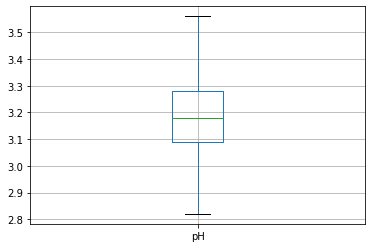

In [65]:
new_data.boxplot('pH')

# Steps for sulphates Column

<AxesSubplot:>

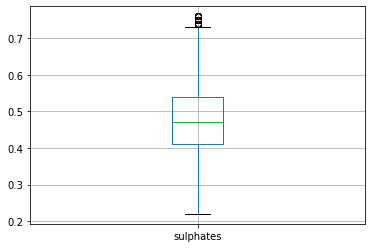

In [66]:
new_data.boxplot('sulphates')

In [67]:
 #Finding IQR for the removal of outliers of the values of sulphates column
sort_data = np.sort(new_data['sulphates'])
Q1 = np.percentile(new_data['sulphates'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['sulphates'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.13000000000000006


In [68]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.21499999999999989
Upper limit is: 0.7350000000000001
Q1: 0.41
Q3: 0.54


In [69]:
outliers = new_data.sulphates[(new_data.sulphates >= up_lim) | (new_data.sulphates <= low_lim )]
print(outliers)

70      0.75
157     0.75
241     0.74
420     0.75
741     0.75
824     0.76
947     0.75
1152    0.76
1230    0.75
1266    0.76
1292    0.76
1298    0.74
1337    0.74
1350    0.75
1471    0.75
1521    0.75
1549    0.74
1651    0.74
1748    0.75
1818    0.74
1875    0.76
1889    0.75
1943    0.76
Name: sulphates, dtype: float64


In [70]:
new_data.shape 

(1928, 12)

In [71]:
#dropping the outliers
new_data.drop(new_data[new_data['sulphates']>= 0.7350000000000001].index, inplace = True)
new_data.shape

(1905, 12)

In [72]:
#dropping the outliers
new_data.drop(new_data[new_data['sulphates']<= 0.21499999999999989].index, inplace = True)
new_data.shape

(1905, 12)

<AxesSubplot:>

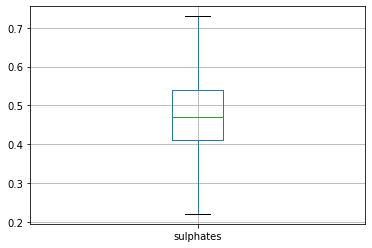

In [73]:
new_data.boxplot('sulphates')

# Steps for alcohol Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

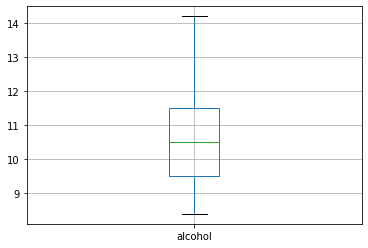

In [74]:
new_data.boxplot('alcohol')

In [ ]:
# new_data['quality'] = new_data['quality'].where(new_data['quality']<= 5, 0)
# new_data['quality'] = new_data['quality'].where(new_data['quality']>5, 1)
# new_data['quality'] = new_data['quality'].map({0:'Average', 1:'Good'})